# 02 Datenverarbeitung

Das Skript hier macht Folgendes:
* Datensatz laden
* Kader anhand von Berufsbezeichnung identifizieren
* Geschlechterverhältnis über **alle Direktionen** hinweg, absolut & in Prozent
    * aller Angestellten 
    * im Kader
* Geschlechterverhältnis in den **einzelnen Direktionen**, absolut & in Prozent
    * aller Angestellten  
    * im Kader

_Zwischenschritt: Das aus 01 Scraper exportierte File (Verzeichnis_full.csv) habe ich mit Numbers von Doppeleinträgen bereinigt (neu: Verzeichnis_cut.csv). Die Datenbank des Staatskalenders führte pro Funktion einer Person einen Eintrag, diese zu jeweils einem Eintrag pro Person zu kondensieren ging manuell am einfachsten._

In [1]:
# Sachen importieren

import pandas as pd
import re
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [2]:
# DataFrame laden

df = pd.read_csv('Verzeichnis_cut.csv')
df.head(2)

,Name,Gender,Email,Direktion,Sektion,Abteilung,Funktion
0,Abeztout Abderrahim,Herr,abderrahim.abeztout@fr.ch,"Raumplanungs-, Umwelt- und Baudirektion",RUBD - Hochbauamt,Technische Abteilung,Architektin
1,Ackermann Christophe,Herr,christophe.ackermann@fr.ch,Finanzdirektion,FIND - Finanzinspektorat,Finanzinspektorat,Adjunkt der Dienstchefin


## Kader einteilen

#### Neue Spalte mit Regex-Suche

In [3]:
# Kader-Funktionen definieren, Boolean-Spalte erstellen anhand davon ob einer der Begriffe
# in der Spalte 'Funktion' enthalten ist

searchfor = [r"\w*chef\w*", r"Vorsteher\w*", r"Staatsr\wt\w*", r"\w*leiter\S*", 
            r"\w*erantwortliche\w*", "\w*irektor\w*", r"\w*beramtmann"]

df['Kader'] = df['Funktion'].str.contains('|'.join(searchfor))

In [4]:
# Tadaaa:

df.head(2)

,Name,Gender,Email,Direktion,Sektion,Abteilung,Funktion,Kader
0,Abeztout Abderrahim,Herr,abderrahim.abeztout@fr.ch,"Raumplanungs-, Umwelt- und Baudirektion",RUBD - Hochbauamt,Technische Abteilung,Architektin,False
1,Ackermann Christophe,Herr,christophe.ackermann@fr.ch,Finanzdirektion,FIND - Finanzinspektorat,Finanzinspektorat,Adjunkt der Dienstchefin,True


## Geschlechterverhältnis insgesamt


In [5]:
# Zuerst die absoluten Zahlen über alle Angestellten hinweg

df['Gender'].value_counts()

Frau    767
Herr    735
Name: Gender, dtype: int64

In [6]:
# Geschlechterverhältnis aller Angestellten in Prozent 

df['Gender'].value_counts() / df['Gender'].value_counts().sum()*100


Frau    51.065246
Herr    48.934754
Name: Gender, dtype: float64

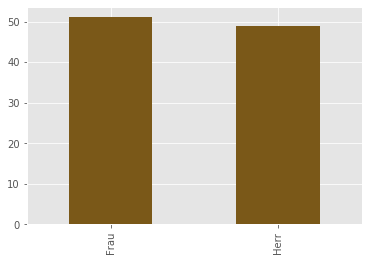

In [22]:
# Graph Geschlechterverhältnis aller Angestellten in Prozent

(df['Gender'].value_counts() / df['Gender'].value_counts().sum()*100).plot(kind='bar', color='#7A5818')

## Geschlechterverhältnis insgesamt im Kader

In [8]:
kader_absolut = df[df['Kader'] == True]['Gender'].value_counts(ascending=True)

kader_absolut 

Frau    145
Herr    274
Name: Gender, dtype: int64

In [9]:
(kader_absolut / kader_absolut.sum())*100

Frau    34.606205
Herr    65.393795
Name: Gender, dtype: float64

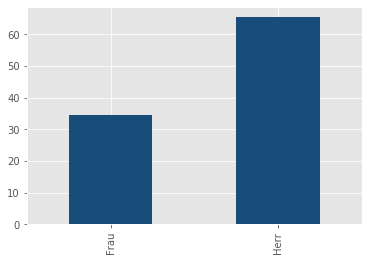

In [24]:
((kader_absolut / kader_absolut.sum())*100).plot(kind='bar', color='#184D7A')

In [11]:
alle_a = (df['Gender'].value_counts() / df['Gender'].value_counts().sum()*100)
kader_a = ((kader_absolut / kader_absolut.sum())*100)

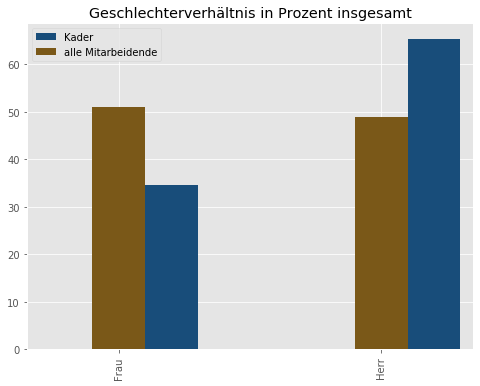

In [26]:
# test Geschlechterverhältnis alle Mitarbeitenden vs alle Kader
fig, ax = plt.subplots()
ax = kader_a.plot(kind='bar', position=-0.5, width=0.2, figsize=(8, 6), color='#184D7A', legend='True', label='Kader')
alle_a.plot(kind='bar', position=0.5, color='#7A5818', width=0.2, label='alle Mitarbeidende', legend='True', title='Geschlechterverhältnis in Prozent insgesamt', ax=ax)


## Geschlechterverhältnis nach Direktionen sortiert

In [15]:
# Geschlechterverhältnis in Prozent aller Mitarbeitenden nach Direktion

direktion_gender = df.groupby('Direktion')['Gender'].value_counts()
direktion_gender.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

Gender,Frau,Herr
Direktion,,
Direktion der Institutionen und der Land- und Forstwirtschaft,44.619423,55.380577
"Direktion für Erziehung, Kultur und Sport",55.916473,44.083527
Direktion für Gesundheit und Soziales,70.940171,29.059829
Finanzdirektion,42.156863,57.843137
"Raumplanungs-, Umwelt- und Baudirektion",44.534413,55.465587
Sicherheits- und Justizdirektion,40.000000,60.000000
Volkswirtschaftsdirektion,56.043956,43.956044


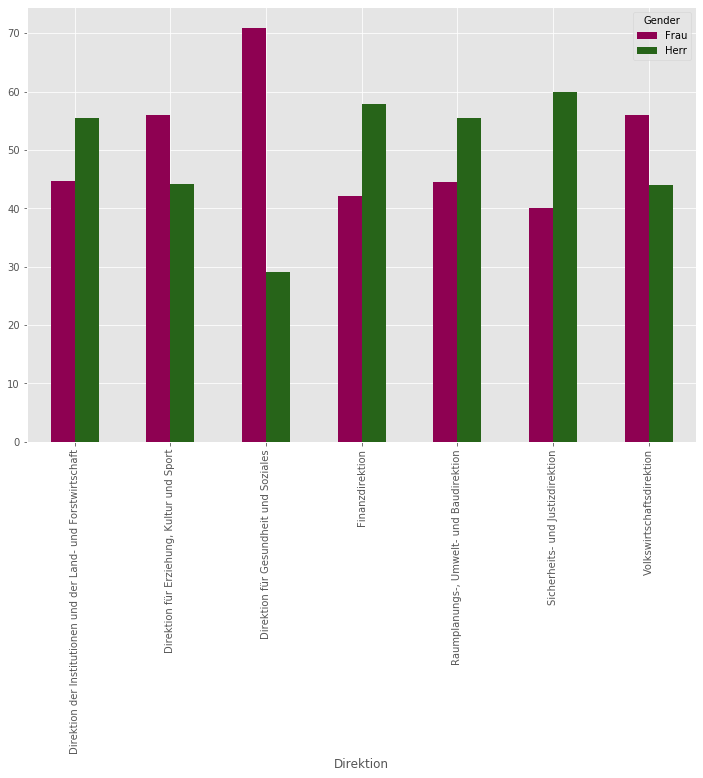

In [16]:
# Graph Geschlechterverhältnis in Prozent aller Mitarbeitenden nach Direktion

direktion_gender.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(kind='bar', colormap='PiYG', figsize=(12, 8))

## Geschlechterverhältnis im Kader berechnen

In [17]:
# Filter Nach Kader, .groupby Werte absolut

df[df['Kader'] == True].groupby('Direktion')['Gender'].value_counts().unstack()

Gender,Frau,Herr
Direktion,,
Direktion der Institutionen und der Land- und Forstwirtschaft,16,56
"Direktion für Erziehung, Kultur und Sport",73,96
Direktion für Gesundheit und Soziales,12,15
Finanzdirektion,6,13
"Raumplanungs-, Umwelt- und Baudirektion",17,58
Sicherheits- und Justizdirektion,1,8
Volkswirtschaftsdirektion,20,28


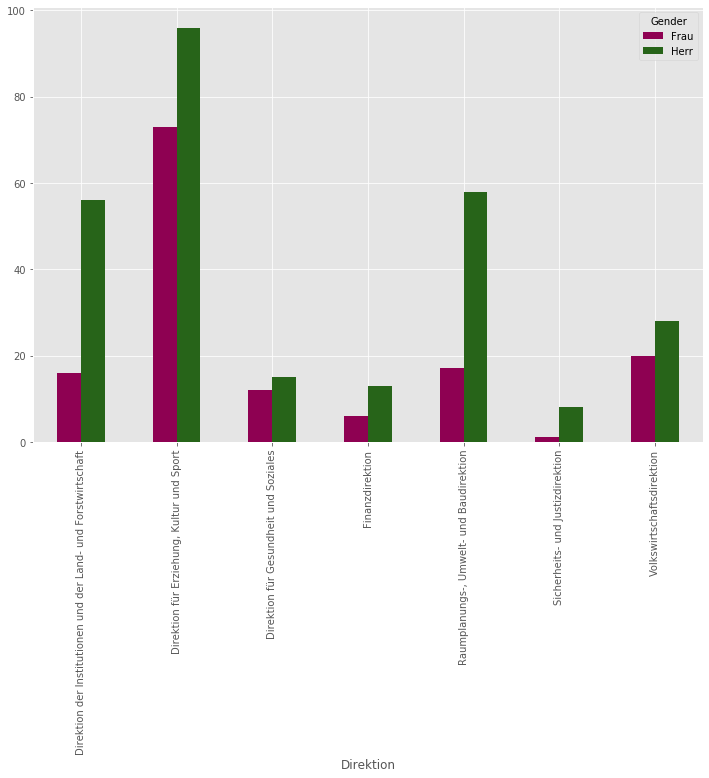

In [18]:
# Kader absolut plotten

df[df['Kader'] == True].groupby('Direktion')['Gender'].value_counts().unstack().plot(kind='bar', colormap='PiYG', figsize=(12, 8))

In [19]:
# Prozent berechnen Direktion/ Kader
direktion_kader = df[df['Kader'] == True].groupby('Direktion')['Gender'].value_counts()
direktion_kader.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

Gender,Frau,Herr
Direktion,,
Direktion der Institutionen und der Land- und Forstwirtschaft,22.222222,77.777778
"Direktion für Erziehung, Kultur und Sport",43.195266,56.804734
Direktion für Gesundheit und Soziales,44.444444,55.555556
Finanzdirektion,31.578947,68.421053
"Raumplanungs-, Umwelt- und Baudirektion",22.666667,77.333333
Sicherheits- und Justizdirektion,11.111111,88.888889
Volkswirtschaftsdirektion,41.666667,58.333333


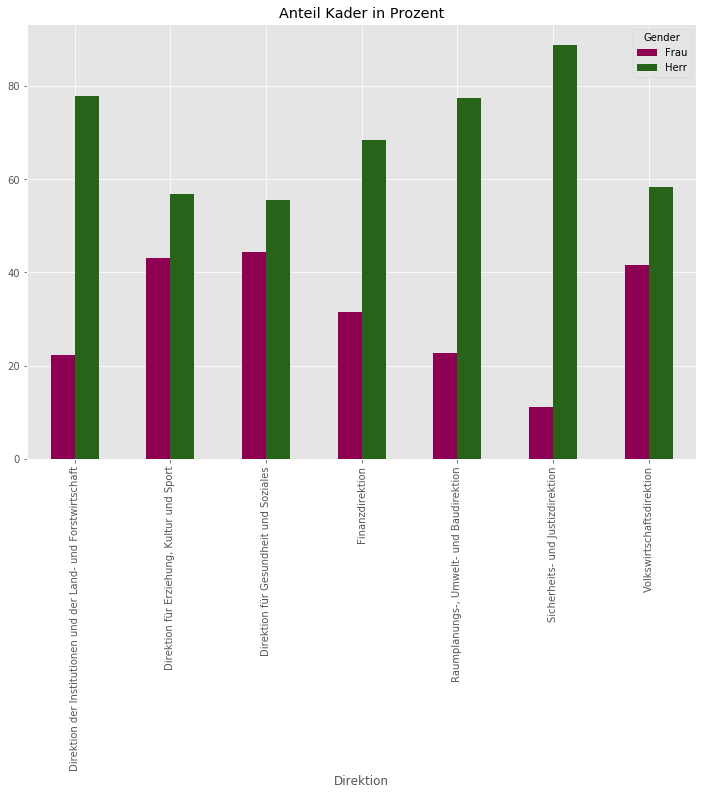

In [20]:
# Graph Anteil Kader in Prozent

direktion_kader.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(kind='bar', colormap='PiYG', title='Anteil Kader in Prozent', figsize=(12, 8))

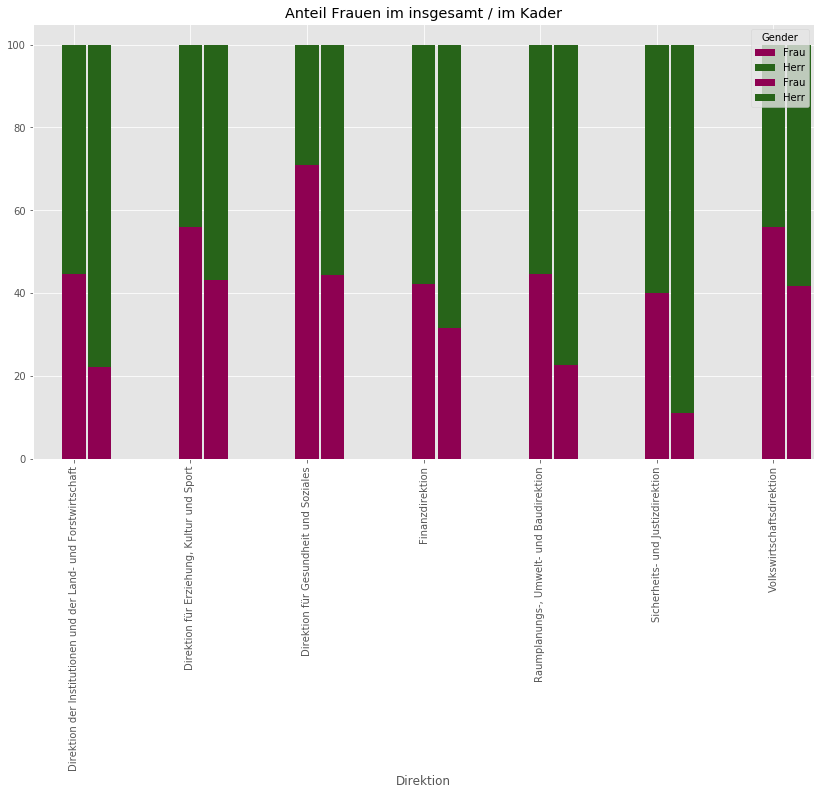

In [21]:
# Graph kombiniert Anteil Frauen in den Direktionen insgesamt und im Kader

ax = direktion_kader.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(kind='bar', stacked = 'True', width=0.2, figsize=(14, 8), colormap='PiYG', position=-0.6)
ax = direktion_gender.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(kind='bar', stacked = 'True', title='Anteil Frauen im insgesamt / im Kader',colormap='PiYG', width=0.2, position=0.5, ax=ax)

